## Beginning experiments

In the other notebook "Semantic Network Experiment", we were exploring different foundational pieces of building semantic networks. Now that we have a better idea of how this works and a first-pass at code for building the semantic networks, it's time to refine and document the word embedding and network building processes.

The first step of the network building process is loading data from our mongo database. Mongo is not the standard way, it seems most read from disk. However our cable news corpus is there and forms a nice interface across delivery/ingestion systems.



In [3]:
# the first step is to access the mongodb collection of interest
from util import *
# here we just list the names of the IATV corpora that are available
names = get_iatv_corpus_names()
# we will be interested in the last two corpora; the first for simple experiments and the second for full experiment
print(names[-2:])

['Sample Week for Zipf experiment', 'Three Months for Semantic Network Experiments']


In [4]:
# we are just doing the sample week this time
%timeit fox_texts, counts = get_corpus_text(names[-2], 'FOXNEWSW')

1 loop, best of 3: 684 ms per loop


In [8]:
# let's time the full text generation just to see
%timeit fox_texts_full, counts = get_corpus_text(names[-1], 'FOXNEWSW') 

1 loop, best of 3: 10.8 s per loop


In [32]:
from build_network import PPMI

fox_texts, counts = get_corpus_text(names[-2], 'FOXNEWSW')

import cProfile

# now we go from minutes to seconds to calculate the PPMI for the entire week. 
# see the other "timings" notebook for the full fox texts 
cProfile.run('PPMI.from_texts(fox_texts)')

         2154138 function calls in 6.233 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.255    0.255    6.233    6.233 <string>:1(<module>)
     4002    0.001    0.000    0.001    0.000 build_network.py:18(__init__)
        1    0.000    0.000    0.000    0.000 build_network.py:197(__init__)
        1    0.048    0.048    5.979    5.979 build_network.py:201(from_texts)
        1    5.510    5.510    5.931    5.931 build_network.py:24(_calculate_ppmi)
        1    0.000    0.000    6.233    6.233 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.len}
   290489    0.059    0.000    0.059    0.000 {built-in method builtins.max}
        1    0.000    0.000    0.000    0.000 {built-in method numpy.core.multiarray.zeros}
   923815    0.090    0.000    0.090    0.000 {method 'append' of 'list' objects}
        1    0.000    0.000    0.000    0.000 {method 'disab

In [46]:
from build_network import Embedding

ppmi = PPMI.from_texts(fox_texts)

#cProfile.run('Embedding.from_ppmi(ppmi)')

In [47]:
# now using randomized_svd based on timings discovered in Timings.ipynb

e = Embedding.from_ppmi(ppmi)

In [48]:
e.matrix.shape

(4002, 300)

In [61]:
g = e.generate_graph(10, words=['swamp', 'environmental'])

on word 0 out of 2
on word 1 out of 2


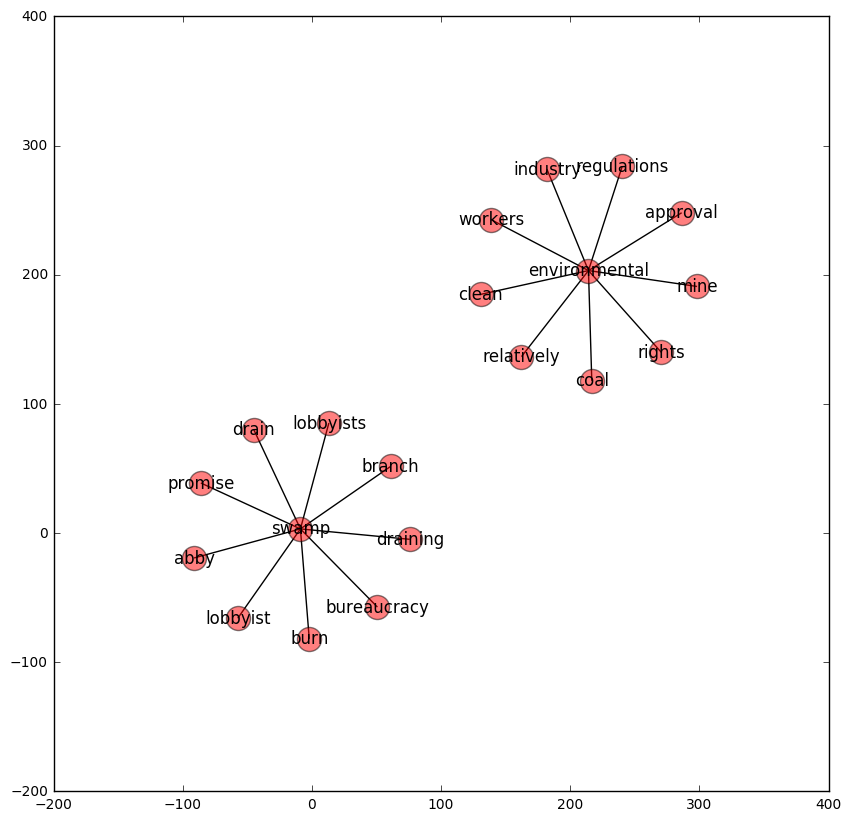

In [62]:
import networkx as nx

plt.figure(figsize=(10, 10))
#node_pos = nx.circular_layout(g)
node_pos = nx.drawing.nx_pydot.graphviz_layout(g)
label_pos = {k: np.array([v[0] + .1, v[1] + .01]) for k, v in node_pos.items()}
#print(pos)
nx.draw_networkx_labels(g, pos=label_pos)
nx.draw_networkx_nodes(g, node_color='r', pos=node_pos, alpha=0.5)
nx.draw_networkx_edges(g, pos=node_pos, width=1.0)
plt.show()

## Conclusion

Looks like the process is working well enough to test out a longer run. Should take a minute or two each, but I will first put everything into a single experimental harness. But even before that, verison control! Almost to alpha...

See the [/notebooks/Experimental Harness Development.ipynb](Experimental Harness Development) notebook for those first tests.